In [159]:
import yfinance as yf

data_sbin = yf.download("SBIN.NS", start="2023-01-01", end="2024-01-01")
print("SBIN.NS Data:", data_sbin.head())
print("SBIN.NS Data Shape:", data_sbin.shape)

data_reliance = yf.download("RELIANCE.NS", start="2023-01-01", end="2024-01-01")
print("RELIANCE.NS Data:", data_reliance.head())
print("RELIANCE.NS Data Shape:", data_reliance.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SBIN.NS Data: Price            Close        High         Low        Open   Volume
Ticker         SBIN.NS     SBIN.NS     SBIN.NS     SBIN.NS  SBIN.NS
Date                                                               
2023-01-02  590.625610  597.378925  589.660851  593.278698  6726084
2023-01-03  590.818542  594.870484  588.503097  592.844513  6818062
2023-01-04  583.872314  593.278717  582.714592  590.287928  7011191
2023-01-05  583.775757  590.046692  580.736801  585.608823  8241475
2023-01-06  579.482666  586.043017  575.961271  585.994791  7972036
SBIN.NS Data Shape: (245, 5)
RELIANCE.NS Data: Price             Close         High          Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                      
2023-01-02  1180.586060  1182.006865  1167.890577  1168.715541     5316175
2023-01-03  1171.946655  1179.256896  1167.707271  1175.613232     7658932
2023-01-04  1154.301

In [160]:
from datetime import datetime, timedelta
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=365)).strftime('%Y-%m-%d')
start_date = datetime.strptime(start_date, '%Y-%m-%d')

In [174]:
data1=pd.read_csv(r'C:\Users\Dell\VENVs\Stock_Advisor\data\raw\RELIANCE.NS.csv')
data1.drop([data1.index[0], data1.index[1]],inplace=True)
data1.rename({data1.columns[0]: "Date"}, axis=1, inplace=True)
data1['Ticker']= 'RELIANCE.NS'
data1['Date'] = pd.to_datetime(data1['Date'])
data1.set_index(["Date"], inplace=True)
data1['Close']

ValueError: cannot assemble with duplicate keys

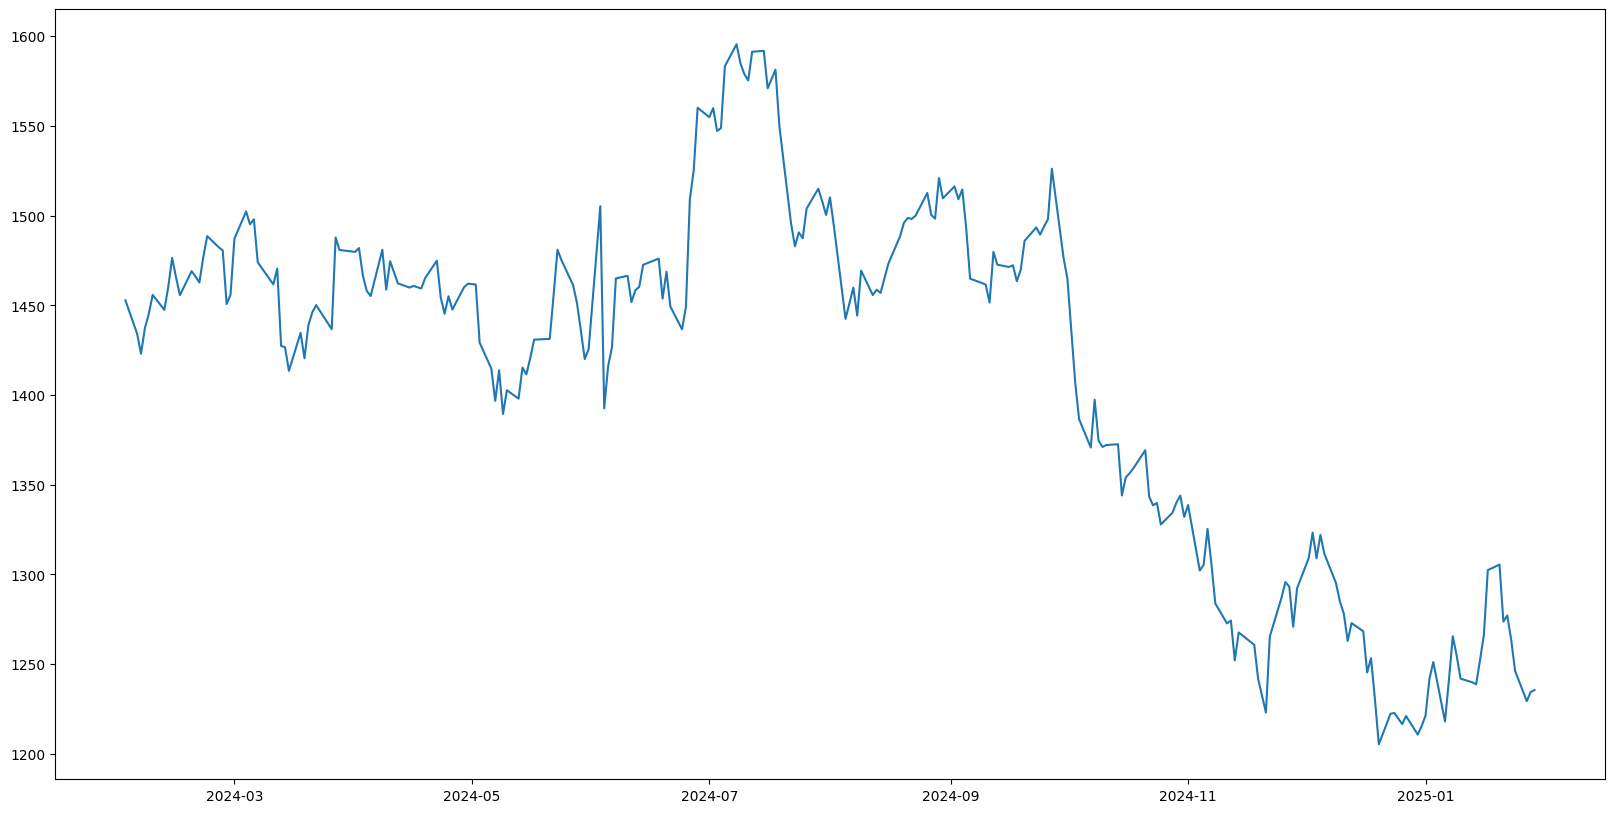

In [162]:
import pandas as pd
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib.ticker import MultipleLocator
plt.figure(figsize=(20, 10))
plt.plot(data1['Close'])

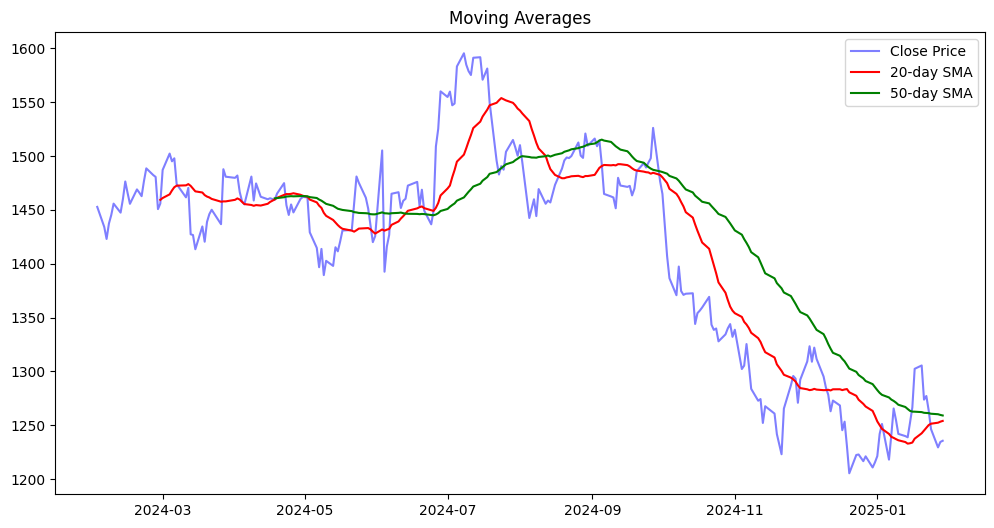

In [163]:
data1['SMA_20'] = data1['Close'].rolling(window=20).mean()  # Short-term
data1['SMA_50'] = data1['Close'].rolling(window=50).mean()  # Long-term

plt.figure(figsize=(12, 6))
plt.plot(data1['Close'], label="Close Price", color='blue', alpha=0.5)
plt.plot(data1['SMA_20'], label="20-day SMA", color='red')
plt.plot(data1['SMA_50'], label="50-day SMA", color='green')
plt.title("Moving Averages")
plt.legend()
plt.show()

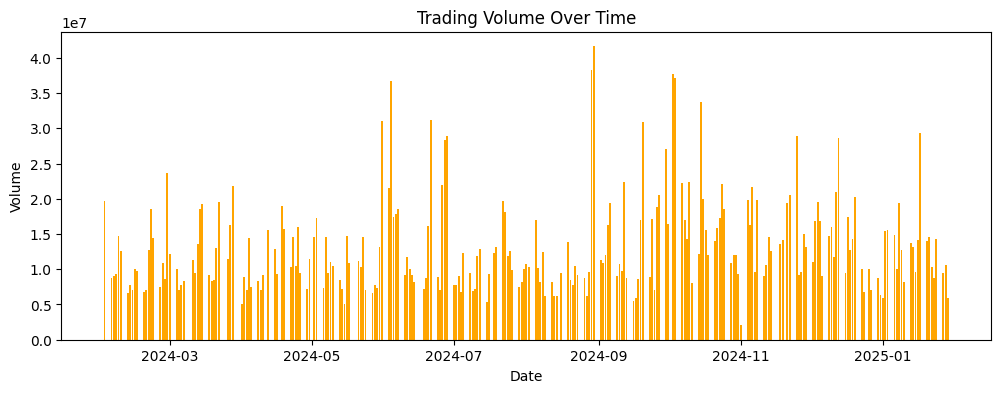

In [164]:
plt.figure(figsize=(12, 4))
plt.bar(data1.index, data1['Volume'], color='orange')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

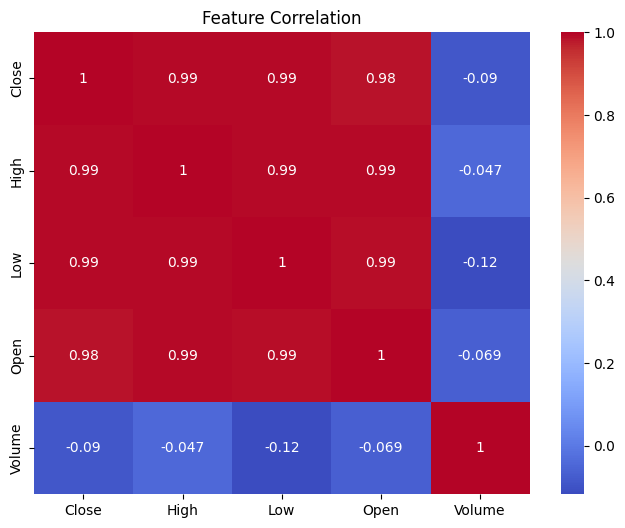

In [165]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(data1[['Close', 'High', 'Low', 'Open', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


**Augmented Dickey-Fuller (ADF) Test**: Understanding and Importance in Stock Price Analysis\
The Augmented Dickey-Fuller (ADF) test is a statistical test used to check whether a given time series data is stationary or non-stationary.

📌 **Stationarity**: A time series is stationary if its statistical properties (mean, variance, and autocorrelation) do not change over time.

**Why is the ADF Test Important in Stock Price Prediction?**\
Many machine learning models (e.g., Linear Regression, ARIMA, LSTMs, etc.) assume stationarity for accurate predictions.
Stock prices are often non-stationary (trends & seasonality present), but most models perform better on stationary data.
If the ADF test confirms non-stationarity, we may need to transform the data (e.g., differencing, logarithms) to make it suitable for modeling.


**How Does the ADF Test Work?**\
The null hypothesis (H₀) and alternative hypothesis (H₁) are:

H₀ (Null Hypothesis): The data has a unit root, meaning it is non-stationary.\
H₁ (Alternative Hypothesis): The data is stationary.

Interpreting the ADF Test Results\
If p-value > 0.05 → Fail to reject H₀ → Data is non-stationary\
If p-value < 0.05 → Reject H₀ → Data is stationary

In [158]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data1['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is non-stationary.")


ADF Statistic: -0.8187200418534003
p-value: 0.8135612579571956
The data is non-stationary.


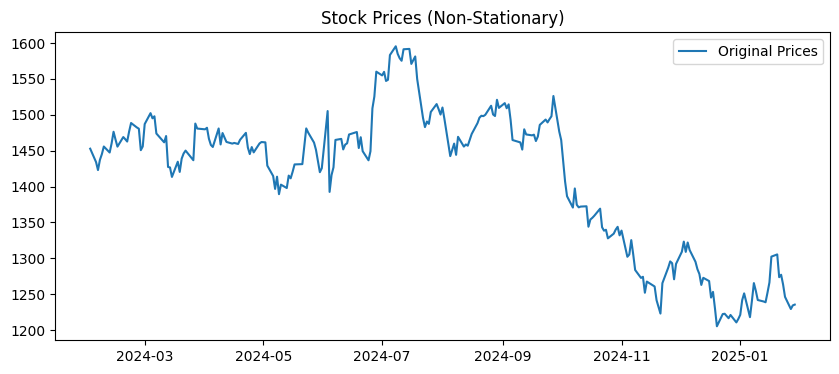

In [166]:
plt.figure(figsize=(10, 4))
plt.plot(data1['Close'], label="Original Prices")
plt.title("Stock Prices (Non-Stationary)")
plt.legend()
plt.show()

✅ Differencing helps in predicting stock prices by transforming non-stationary data into a form that models can learn from.\
✅ It captures momentum and real price movement rather than misleading trends.\
✅ It improves the accuracy of forecasting models like ARIMA, LSTMs, and other ML algorithms.

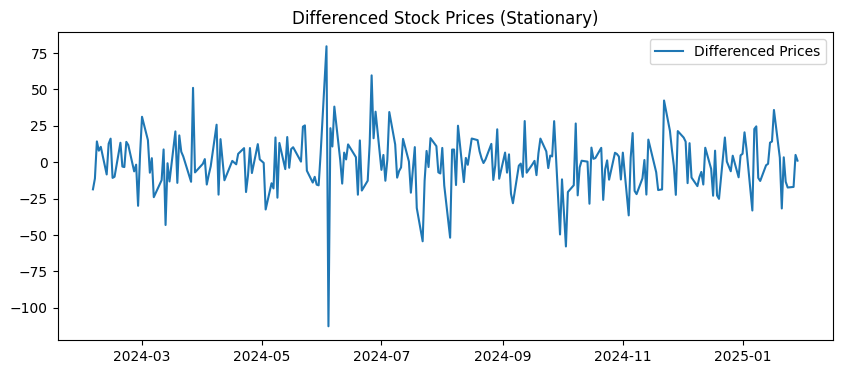

In [167]:
data1['Close_diff'] = data1['Close'].diff()
plt.figure(figsize=(10, 4))
plt.plot(data1['Close_diff'], label="Differenced Prices")
plt.title("Differenced Stock Prices (Stationary)")
plt.legend()
plt.show()

In [169]:
data1.isnull().sum()

Ticker         0
Close          0
High           0
Low            0
Open           0
Volume         0
SMA_20        19
SMA_50        49
Close_diff     1
dtype: int64

In [2]:
import pandas as pd
data2=pd.read_csv(r"C:\Users\Dell\VENVs\Stock_Advisor\data\processed\RELIANCE.NS.csv")
data3=pd.read_csv(r"C:\Users\Dell\VENVs\Stock_Advisor\data\processed\SBIN.NS.csv")
data3.isnull().sum()
data3.drop(['Unnamed: 0','Date','ticker'], axis=1, inplace=True)
data3

,Close,High,Low,Open,Volume,SMA_14,EMA_14,Daily_Return,Rolling_Mean,Rolling_Std,Upper_Band,Lower_Band,RSI_14,Price_Diff_1,Price_Diff_2
0,735.761475,741.465863,724.992122,731.630794,19217113,737.370257,728.738227,0.007542,714.970187,41.630686,798.231560,631.708815,58.818981,5.507568,-1.721191
1,756.464355,759.267326,739.548025,739.597188,17348526,741.673100,732.435044,0.028138,720.846640,38.511089,797.868818,643.824462,72.983137,20.702881,26.210449
2,759.316528,764.184900,756.316844,761.627806,9789141,745.789777,736.019242,0.003770,727.195178,33.261661,793.718500,660.671856,72.434932,2.852173,23.555054
3,771.020264,773.970784,756.415150,756.808577,18088847,748.638436,740.686045,0.015414,733.769922,27.520830,788.811581,678.728263,68.014241,11.703735,14.555908
4,770.971069,777.265477,760.152494,770.725193,26710525,750.197998,744.724048,-0.000064,739.112823,23.341218,785.795260,692.430387,61.770958,-0.049194,11.654541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,749.200012,755.349976,735.900024,740.000000,11433353,754.828578,760.377572,0.006786,765.275009,20.201281,805.677571,724.872447,39.707422,5.049988,3.299988
224,752.400024,759.750000,745.400024,757.000000,14140860,753.489293,759.313899,0.004271,763.147510,19.123391,801.394292,724.900728,43.262667,3.200012,8.250000
225,758.450012,760.799988,749.799988,753.000000,9251973,753.346436,759.198714,0.008041,761.410010,17.780701,796.971411,725.848608,49.256506,6.049988,9.250000
226,762.599976,765.000000,754.750000,758.549988,11085824,754.728577,759.652216,0.005472,759.480008,15.132027,789.744062,729.215954,57.966234,4.149963,10.199951


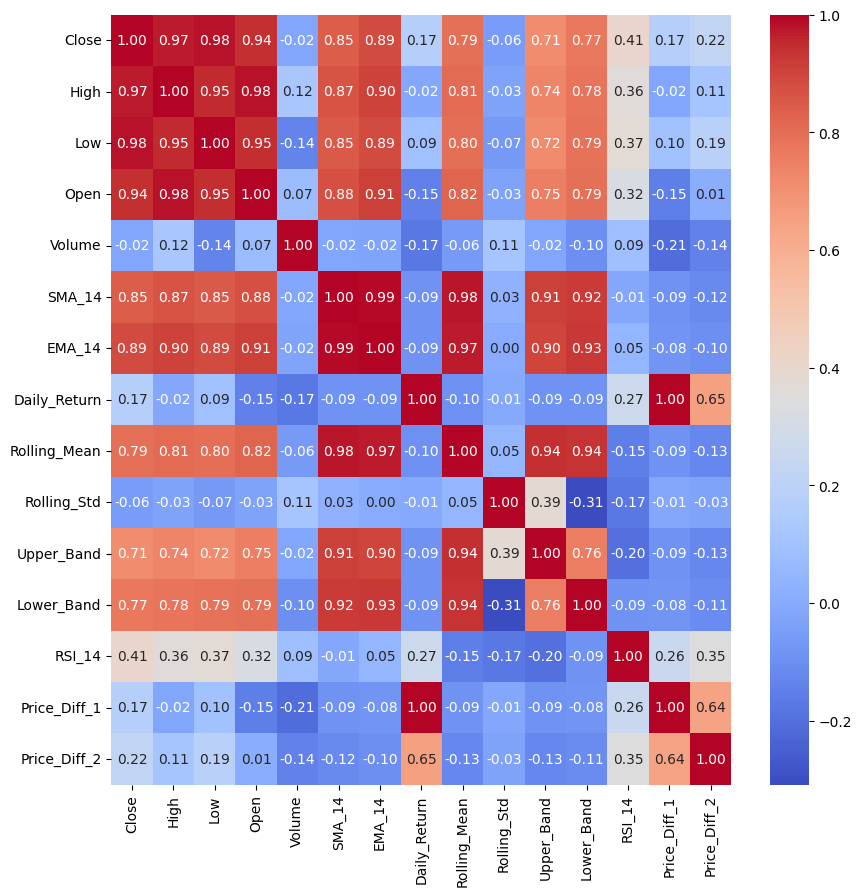

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data3.corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.show()

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data3[['Close', 'Open', 'High', 'Low', 'SMA_14', 'EMA_14', 'Daily_Return', 'RSI_14']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


        Feature           VIF
0         Close  91674.444520
1          Open  58621.899649
2          High  36208.161318
3           Low  18828.282063
4        SMA_14  35095.944123
5        EMA_14  54627.950398
6  Daily_Return     13.025105
7        RSI_14     39.113045


In [5]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Load data3
#data3 = ...  # Load your dataset
X = data3.drop(columns=['Close'])  # Features
y = data3['Close']  # Target variable (can be shifted for future prediction)

# Train a Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)


         Feature  Importance
1            Low    0.668022
0           High    0.315916
6   Daily_Return    0.003060
12  Price_Diff_1    0.002804
13  Price_Diff_2    0.001891
11        RSI_14    0.001702
10    Lower_Band    0.001407
2           Open    0.001190
3         Volume    0.001008
8    Rolling_Std    0.000660
9     Upper_Band    0.000654
7   Rolling_Mean    0.000598
5         EMA_14    0.000582
4         SMA_14    0.000507


In [1]:
import os

SCALED_DATA_PATH = r'C:\Users\Dell\VENVs\Stock_Advisor\data\scaled_data\lstm'
files = os.listdir(SCALED_DATA_PATH)
print("Saved scaler files:", files)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Dell\\VENVs\\Stock_Advisor\\data\\scaled_data\\lstm'

In [14]:
import random
import math

def monte_carlo_pi(num_samples):
    inside_circle = 0
    for _ in range(num_samples):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            inside_circle += 1
    return 4 * inside_circle / num_samples

# Estimate pi using 1,000,000 samples
pi_estimate = monte_carlo_pi(1000000)
print(f"Estimated value of pi: {pi_estimate}")

Estimated value of pi: 3.141392


In [2]:
import pandas as pd
raw_file = pd.read_csv(r'C:\Users\Dell\VENVs\Stock_Advisor\data\raw\RELIANCE.NS.csv')
actual_prices = raw_file['Close']
actual_prices

0      1464.028320
1      1461.073486
2      1457.770996
3      1471.725952
4      1483.520630
          ...     
243    1234.849976
244    1216.550049
245    1216.099976
246    1217.250000
247    1224.900024
Name: Close, Length: 248, dtype: float64

In [4]:
import os
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

# Load API key from environment variable or replace with your key for testing
ALPHA_VANTAGE_API_KEY = os.getenv('JO8G6VONBJZIPX6E')

def fetch_stock_data(symbol, outputsize='full'):
    """
    Fetch last 5 years of daily stock data from Alpha Vantage.
    
    Args:
    - symbol (str): Stock ticker (e.g., "RELIANCE.BSE").
    - outputsize (str): "compact" (100 days) or "full" (all available data).
    
    Returns:
    - DataFrame: Filtered stock data with Date as index (last 5 years).
    """
    ts = TimeSeries(key='JO8G6VONBJZIPX6E', output_format='pandas')
    data, meta_data = ts.get_daily(symbol=symbol, outputsize=outputsize)
    
    # Rename columns to match existing format
    data.rename(columns={
        '1. open': 'Open',
        '2. high': 'High',
        '3. low': 'Low',
        '4. close': 'Close',
        '5. volume': 'Volume'
    }, inplace=True)

    # Convert index to datetime and sort ascending
    data.index = pd.to_datetime(data.index)
    data.sort_index(inplace=True)

    # Filter data to keep only the last 5 years
    five_years_ago = pd.Timestamp.today() - pd.DateOffset(years=5)
    data = data[data.index >= five_years_ago]

    return data

In [5]:
symbol = 'RELIANCE.BSE'
df = fetch_stock_data(symbol)
print(f"Fetched {len(df)} rows for {symbol}.")

last_date = pd.to_datetime(df.index[-1])
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=5, freq='B')
print(last_date)
print("Future dates for prediction:", future_dates)


Fetched 1234 rows for RELIANCE.BSE.
2025-03-04 00:00:00
Future dates for prediction: DatetimeIndex(['2025-03-05', '2025-03-06', '2025-03-07', '2025-03-10',
               '2025-03-11'],
              dtype='datetime64[ns]', freq='B')


In [ ]:
import os
import pandas as pd
RAW_DATA_PATH = r'C:\Users\Dell\VENVs\Stock_Advisor\data\raw'
PREPROCESSED_DATA_PATH = r'C:\Users\Dell\VENVs\Stock_Advisor\data\processed'
path=r'C:\Users\Dell\VENVs\Stock_Advisor\data\raw\RELIANCE.BSE.csv'
files=[file for file in os.listdir(PREPROCESSED_DATA_PATH) if file.endswith('.csv')]
df=pd.read_csv(path)
#df.drop()
#df.drop(df.index)
#df.rename({df.columns[0]: "date"}, axis=1,inplace=True)
df.set_index(["date"], inplace=True)
last_date = pd.to_datetime(df.index[-1])
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=5, freq='B')
last_date
future_dates
#future_dates

'2025-03-05'